https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py


In [2]:
import numpy as np
import pandas as pd
import gymnasium as gym

from env.environments import TradingEnv


## Run

In [3]:
BM = 10   # Minimum buy commission
BP = 0.02 # Buy commission percentage
SM = 15   # Minimum sell commission
SP = 0.03 # Sell commission percentage

# Day 1 using First-In, First-Out (FIFO) method
N1 = 100                                                              # Number of units bought
P1 = 50                                                               # Price per unit on Day 1
C1 = 55                                                               # Market value per unit on Day 1
CommissionBuy1 = max(BM, BP * N1 * P1)                                # Calculate commission for Day 1 buy
TotalCost1_FIFO = (N1 * P1) + CommissionBuy1                          # Total cost for Day 1 (including commission)
Value1_FIFO = N1 * C1                                                 # Market value of position on Day 1
RealizedPnL1_FIFO = 0  # No sales yet                                 # Realized PnL for Day 1
UnrealizedPnL1_FIFO = Value1_FIFO - TotalCost1_FIFO                   # Unrealized PnL for Day 1
CumulativePnL1_FIFO = RealizedPnL1_FIFO + UnrealizedPnL1_FIFO         # Cumulative PnL after Day 1
ROI1_FIFO = ((Value1_FIFO - TotalCost1_FIFO) / TotalCost1_FIFO) * 100 # Daily ROI for Day 1
CumulativeROI1_FIFO = ROI1_FIFO                                       # Cumulative ROI after Day 1
AbsoluteDrawdown1_FIFO = 0                                            # Absolute Drawdown for Day 1
PercentageDrawdown1_FIFO = 0                                          # Percentage Drawdown for Day 1
print("Day 1 FIFO results:")
print("CommissionBuy1:", CommissionBuy1)
print("TotalCost1_FIFO:", TotalCost1_FIFO)
print("Value1_FIFO:", Value1_FIFO)

# Day 2 using First-In, First-Out (FIFO) method
N2 = 150  # Additional units bought
P2 = 60   # Price per unit on Day 2
C2 = 65   # Market value per unit on Day 2
CommissionBuy2 = max(BM, BP * N2 * P2)                                              # Calculate commission for Day 2 buy
TotalCost2_FIFO = (N2 * P2) + CommissionBuy2                                        # Additional cost for Day 2 (including commission)
TotalUnits2 = N1 + N2                                                               # Total units held
TotalCostBasis2_FIFO = TotalCost1_FIFO + TotalCost2_FIFO                            # Total cost basis (including commissions)
Value2_FIFO = TotalUnits2 * C2                                                      # Market value of position on Day 2
RealizedPnL2_FIFO = 0  # No sales yet                                               # Realized PnL for Day 2
UnrealizedPnL2_FIFO = Value2_FIFO - TotalCostBasis2_FIFO                            # Unrealized PnL for Day 2
CumulativePnL2_FIFO = CumulativePnL1_FIFO + RealizedPnL2_FIFO + UnrealizedPnL2_FIFO # Cumulative PnL after Day 2
ROI2_FIFO = ((Value2_FIFO - TotalCostBasis2_FIFO) / TotalCostBasis2_FIFO) * 100     # Daily ROI for Day 2
CumulativeROI2_FIFO = CumulativeROI1_FIFO + ROI2_FIFO                               # Cumulative ROI after Day 2
# Absolute Drawdown for Day 2
AbsoluteDrawdown2_FIFO = max(0, CumulativePnL1_FIFO + RealizedPnL2_FIFO + UnrealizedPnL2_FIFO - Value2_FIFO)
# Percentage Drawdown for Day 2
PercentageDrawdown2_FIFO = (AbsoluteDrawdown2_FIFO / (CumulativePnL1_FIFO + RealizedPnL2_FIFO + UnrealizedPnL2_FIFO)) * 100
print("Day 2 FIFO results:")
print("CommissionBuy2:", CommissionBuy2)
print("TotalCost2_FIFO:", TotalCost2_FIFO)
print("Value2_FIFO:", Value2_FIFO)

# Day 3 using First-In, First-Out (FIFO) method
N3 = 80   # Units sold
P3 = 70   # Price per unit on Day 3
C3 = 75   # Market value per unit on Day 3
CommissionSell3 = max(SM, SP * N3 * P3)                    # Calculate commission for Day 3 sell
NetSale3 = (N3 * P3) - CommissionSell3                     # Sale proceeds after commission
RemainingUnits3 = TotalUnits2 - N3                         # Remaining units held after the sale
AdjustedCost3_FIFO = TotalCostBasis2_FIFO - (N3 * P1)      # Adjusted cost basis for remaining units using FIFO
ValueRemaining3_FIFO = RemainingUnits3 * C3                # Market value of remaining position on Day 3
RealizedPnL3_FIFO = NetSale3 - (N3 * P1)                    # Realized PnL from the sale on Day 3
UnrealizedPnL3_FIFO = ValueRemaining3_FIFO - AdjustedCost3_FIFO # Unrealized PnL for Day 3
# Cumulative PnL after Day 3
CumulativePnL3_FIFO = CumulativePnL2_FIFO + RealizedPnL3_FIFO + UnrealizedPnL3_FIFO
# Daily ROI for Day 3
ROI3_FIFO = ((NetSale3 + ValueRemaining3_FIFO - AdjustedCost3_FIFO) / AdjustedCost3_FIFO) * 100
# Cumulative ROI after Day 3
CumulativeROI3_FIFO = CumulativeROI2_FIFO + ROI3_FIFO
# Absolute Drawdown for Day 3
AbsoluteDrawdown3_FIFO = max(0, CumulativePnL1_FIFO + RealizedPnL3_FIFO + UnrealizedPnL3_FIFO - ValueRemaining3_FIFO)
# Percentage Drawdown for Day 3
PercentageDrawdown3_FIFO = (AbsoluteDrawdown3_FIFO / (CumulativePnL1_FIFO + RealizedPnL3_FIFO + UnrealizedPnL3_FIFO)) * 100
print("Day 3 FIFO results:")
print("CommissionSell3:", CommissionSell3)
print("NetSale3:", NetSale3)
print("ValueRemaining3_FIFO:", ValueRemaining3_FIFO)

# Day 4 using First-In, First-Out (FIFO) method
N4 = 0    # No buys or sells were made
C4 = 80   # Market value per unit on Day 4
Value4_FIFO = RemainingUnits3 * C4                             # Market value of the existing position on Day 4
TotalCostRemaining4_FIFO = AdjustedCost3_FIFO                  # Total cost basis for remaining units using FIFO
RealizedPnL4_FIFO = 0  # No sales made                         # Realized PnL for Day 4
UnrealizedPnL4_FIFO = Value4_FIFO - TotalCostRemaining4_FIFO   # Unrealized PnL for Day 4
CumulativePnL4_FIFO = CumulativePnL3_FIFO                      # Cumulative PnL after Day 4
# Daily ROI for Day 4
ROI4_FIFO = ((Value4_FIFO - TotalCostRemaining4_FIFO) / TotalCostRemaining4_FIFO) * 100
# Cumulative ROI after Day 4
CumulativeROI4_FIFO = CumulativeROI3_FIFO + ROI4_FIFO
# Absolute Drawdown for Day 4
AbsoluteDrawdown4_FIFO = max(0, CumulativePnL1_FIFO + RealizedPnL4_FIFO + UnrealizedPnL4_FIFO - Value4_FIFO)
# Percentage Drawdown for Day 4
PercentageDrawdown4_FIFO = (AbsoluteDrawdown4_FIFO / (CumulativePnL1_FIFO + RealizedPnL4_FIFO + UnrealizedPnL4_FIFO)) * 100
print("Day 4 FIFO results:")
print("Value4_FIFO:", Value4_FIFO)
print("TotalCostRemaining4_FIFO:", TotalCostRemaining4_FIFO)

Day 1 FIFO results:
CommissionBuy1: 100.0
TotalCost1_FIFO: 5100.0
Value1_FIFO: 5500
Day 2 FIFO results:
CommissionBuy2: 180.0
TotalCost2_FIFO: 9180.0
Value2_FIFO: 16250
Day 3 FIFO results:
CommissionSell3: 168.0
NetSale3: 5432.0
ValueRemaining3_FIFO: 12750
Day 4 FIFO results:
Value4_FIFO: 13600
TotalCostRemaining4_FIFO: 10280.0


In [4]:
BM = 10   # Minimum buy commission
BP = 0.02 # Buy commission percentage
SM = 15   # Minimum sell commission
SP = 0.03 # Sell commission percentage

# Day 1 using Weighted Average Cost (WAC) method
N1 = 100                                                          # Number of units bought
P1 = 50                                                           # Price per unit on Day 1
C1 = 55                                                           # Market value per unit on Day 1
CommissionBuy1 = max(BM, BP * N1 * P1)                            # Calculate commission for Day 1 buy
TotalCost1_WAC = (N1 * P1) + CommissionBuy1                       # Total cost for Day 1 (including commission)
Value1_WAC = N1 * C1                                              # Market value of position on Day 1
RealizedPnL1_WAC = 0  # No sales yet                              # Realized PnL for Day 1
UnrealizedPnL1_WAC = Value1_WAC - TotalCost1_WAC                  # Unrealized PnL for Day 1
CumulativePnL1_WAC = RealizedPnL1_WAC + UnrealizedPnL1_WAC        # Cumulative PnL after Day 1
ROI1_WAC = ((Value1_WAC - TotalCost1_WAC) / TotalCost1_WAC) * 100 # Daily ROI for Day 1
CumulativeROI1_WAC = ROI1_WAC                                     # Cumulative ROI after Day 1
AbsoluteDrawdown1_WAC = 0                                         # Absolute Drawdown for Day 1
PercentageDrawdown1_WAC = 0                                       # Percentage Drawdown for Day 1
print("Day 1 WAC results:")
print("CommissionBuy1:", CommissionBuy1, "TotalCost1_WAC:", TotalCost1_WAC, "Value1_WAC:", Value1_WAC)
print("RealizedPnL1_WAC:", RealizedPnL1_WAC, "UnrealizedPnL1_WAC:", UnrealizedPnL1_WAC, "CumulativePnL1_WAC:", CumulativePnL1_WAC)
print("ROI1_WAC:", ROI1_WAC, "CumulativeROI1_WAC:", CumulativeROI1_WAC)
print("AbsoluteDrawdown1_WAC:", AbsoluteDrawdown1_WAC, "PercentageDrawdown1_WAC:", PercentageDrawdown1_WAC)

# Day 2 using Weighted Average Cost (WAC) method
N2 = 150  # Additional units bought
P2 = 60   # Price per unit on Day 2
C2 = 65   # Market value per unit on Day 2
# Calculate commission for Day 2 buy
CommissionBuy2 = max(BM, BP * N2 * P2)
# Additional cost for Day 2 (including commission)
TotalCost2_WAC = (N2 * P2) + CommissionBuy2
# Total units held
TotalUnits2 = N1 + N2
# Total cost basis (including commissions)
TotalCostBasis2_WAC = TotalCost1_WAC + TotalCost2_WAC
# Market value of position on Day 2
Value2_WAC = TotalUnits2 * C2
# Realized PnL for Day 2
RealizedPnL2_WAC = 0  # No sales yet
# Unrealized PnL for Day 2
UnrealizedPnL2_WAC = Value2_WAC - TotalCostBasis2_WAC
# Cumulative PnL after Day 2
CumulativePnL2_WAC = CumulativePnL1_WAC + RealizedPnL2_WAC + UnrealizedPnL2_WAC
# Daily ROI for Day 2
ROI2_WAC = ((Value2_WAC - TotalCostBasis2_WAC) / TotalCostBasis2_WAC) * 100
# Cumulative ROI after Day 2
CumulativeROI2_WAC = CumulativeROI1_WAC + ROI2_WAC
# Absolute Drawdown for Day 2
AbsoluteDrawdown2_WAC = max(0, CumulativePnL1_WAC + RealizedPnL2_WAC + UnrealizedPnL2_WAC - Value2_WAC)
# Percentage Drawdown for Day 2
PercentageDrawdown2_WAC = (AbsoluteDrawdown2_WAC / (CumulativePnL1_WAC + RealizedPnL2_WAC + UnrealizedPnL2_WAC)) * 100
print("Day 2 WAC results:")
print("CommissionBuy2:", CommissionBuy2, "TotalCost2_WAC:", TotalCost2_WAC, "Value2_WAC:", Value2_WAC)
print("RealizedPnL2_WAC:", RealizedPnL2_WAC, "UnrealizedPnL2_WAC:", UnrealizedPnL2_WAC, "CumulativePnL2_WAC:", CumulativePnL2_WAC)
print("ROI2_WAC:", ROI2_WAC, "CumulativeROI2_WAC:", CumulativeROI2_WAC)
print("AbsoluteDrawdown2_WAC:", AbsoluteDrawdown2_WAC, "PercentageDrawdown2_WAC:", PercentageDrawdown2_WAC)

# Day 3 using Weighted Average Cost (WAC) method
N3 = 80   # Units sold
P3 = 70   # Price per unit on Day 3
C3 = 75   # Market value per unit on Day 3
# Calculate commission for Day 3 sell
CommissionSell3 = max(SM, SP * N3 * P3)
# Sale proceeds after commission
NetSale3 = (N3 * P3) - CommissionSell3
# Remaining units held after the sale
RemainingUnits3 = TotalUnits2 - N3
# Total cost basis for remaining units using WAC
TotalCostRemaining3_WAC = TotalCostBasis2_WAC - (N3 * (TotalCostBasis2_WAC / TotalUnits2))
# Market value of remaining position on Day 3
ValueRemaining3_WAC = RemainingUnits3 * C3
# Realized PnL from the sale on Day 3
RealizedPnL3_WAC = NetSale3 - (N3 * (TotalCostBasis2_WAC / TotalUnits2))
# Unrealized PnL for Day 3
UnrealizedPnL3_WAC = ValueRemaining3_WAC - TotalCostRemaining3_WAC
# Cumulative PnL after Day 3
CumulativePnL3_WAC = CumulativePnL2_WAC + RealizedPnL3_WAC + UnrealizedPnL3_WAC
# Daily ROI for Day 3
ROI3_WAC = ((NetSale3 + ValueRemaining3_WAC - TotalCostRemaining3_WAC) / TotalCostRemaining3_WAC) * 100
# Cumulative ROI after Day 3
CumulativeROI3_WAC = CumulativeROI2_WAC + ROI3_WAC
# Absolute Drawdown for Day 3
AbsoluteDrawdown3_WAC = max(0, CumulativePnL1_WAC + RealizedPnL3_WAC + UnrealizedPnL3_WAC - ValueRemaining3_WAC)
# Percentage Drawdown for Day 3
PercentageDrawdown3_WAC = (AbsoluteDrawdown3_WAC / (CumulativePnL1_WAC + RealizedPnL3_WAC + UnrealizedPnL3_WAC)) * 100
print("Day 3 WAC results:")
print("CommissionSell3:", CommissionSell3, "NetSale3:", NetSale3, "ValueRemaining3_WAC:", ValueRemaining3_WAC)
print("RealizedPnL3_WAC:", RealizedPnL3_WAC, "UnrealizedPnL3_WAC:", UnrealizedPnL3_WAC, "CumulativePnL3_WAC:", CumulativePnL3_WAC)
print("ROI3_WAC:", ROI3_WAC, "CumulativeROI3_WAC:", CumulativeROI3_WAC)
print("AbsoluteDrawdown3_WAC:", AbsoluteDrawdown3_WAC, "PercentageDrawdown3_WAC:", PercentageDrawdown3_WAC)

# Day 4 using Weighted Average Cost (WAC) method
N4 = 0    # No buys or sells were made
C4 = 80   # Market value per unit on Day 4
# Market value of the existing position on Day 4
Value4_WAC = RemainingUnits3 * C4
# Total cost basis for remaining units using WAC
TotalCostRemaining4_WAC = TotalCostRemaining3_WAC
# Realized PnL for Day 4
RealizedPnL4_WAC = 0  # No sales made
# Unrealized PnL for Day 4
UnrealizedPnL4_WAC = Value4_WAC - TotalCostRemaining4_WAC
# Cumulative PnL after Day 4
CumulativePnL4_WAC = CumulativePnL3_WAC
# Daily ROI for Day 4
ROI4_WAC = ((Value4_WAC - TotalCostRemaining4_WAC) / TotalCostRemaining4_WAC) * 100
# Cumulative ROI after Day 4
CumulativeROI4_WAC = CumulativeROI3_WAC + ROI4_WAC
# Absolute Drawdown for Day 4
AbsoluteDrawdown4_WAC = max(0, CumulativePnL1_WAC + RealizedPnL4_WAC + UnrealizedPnL4_WAC - Value4_WAC)
# Percentage Drawdown for Day 4
PercentageDrawdown4_WAC = (AbsoluteDrawdown4_WAC / (CumulativePnL1_WAC + RealizedPnL4_WAC + UnrealizedPnL4_WAC)) * 100
print("Day 4 WAC results:")
print("Value4_WAC:", Value4_WAC, "TotalCostRemaining4_WAC:", TotalCostRemaining4_WAC)
print("RealizedPnL4_WAC:", RealizedPnL4_WAC, "UnrealizedPnL4_WAC:", UnrealizedPnL4_WAC, "CumulativePnL4_WAC:", CumulativePnL4_WAC)
print("ROI4_WAC:", ROI4_WAC, "CumulativeROI4_WAC:", CumulativeROI4_WAC)
print("AbsoluteDrawdown4_WAC:", AbsoluteDrawdown4_WAC, "PercentageDrawdown4_WAC:", PercentageDrawdown4_WAC)


Day 1 WAC results:
CommissionBuy1: 100.0 TotalCost1_WAC: 5100.0 Value1_WAC: 5500
RealizedPnL1_WAC: 0 UnrealizedPnL1_WAC: 400.0 CumulativePnL1_WAC: 400.0
ROI1_WAC: 7.8431372549019605 CumulativeROI1_WAC: 7.8431372549019605
AbsoluteDrawdown1_WAC: 0 PercentageDrawdown1_WAC: 0
Day 2 WAC results:
CommissionBuy2: 180.0 TotalCost2_WAC: 9180.0 Value2_WAC: 16250
RealizedPnL2_WAC: 0 UnrealizedPnL2_WAC: 1970.0 CumulativePnL2_WAC: 2370.0
ROI2_WAC: 13.795518207282914 CumulativeROI2_WAC: 21.638655462184875
AbsoluteDrawdown2_WAC: 0 PercentageDrawdown2_WAC: 0.0
Day 3 WAC results:
CommissionSell3: 168.0 NetSale3: 5432.0 ValueRemaining3_WAC: 12750
RealizedPnL3_WAC: 862.4000000000005 UnrealizedPnL3_WAC: 3039.5999999999985 CumulativePnL3_WAC: 6271.999999999999
ROI3_WAC: 87.24254407645408 CumulativeROI3_WAC: 108.88119953863895
AbsoluteDrawdown3_WAC: 0 PercentageDrawdown3_WAC: 0.0
Day 4 WAC results:
Value4_WAC: 13600 TotalCostRemaining4_WAC: 9710.400000000001
RealizedPnL4_WAC: 0 UnrealizedPnL4_WAC: 3889.5999

In [11]:
# Day 1 using Weighted Average Cost (WAC) method
N1 = 100  # Number of units bought
P1 = 50   # Price per unit on Day 1
C1 = 55   # Market value per unit on Day 1
BM = 10   # Minimum buy commission
BP = 0.02 # Buy commission percentage

# Calculate commission for Day 1 buy
CommissionBuy1 = max(BM, BP * N1 * P1)

# Total cost for Day 1 (including commission)
TotalCost1_WAC = (N1 * P1) + CommissionBuy1

# Market value of position on Day 1
Value1_WAC = N1 * C1

# Realized PnL for Day 1
RealizedPnL1_WAC = 0  # No sales yet

# Unrealized PnL for Day 1
UnrealizedPnL1_WAC = Value1_WAC - TotalCost1_WAC

# Cumulative PnL after Day 1
CumulativePnL1_WAC = RealizedPnL1_WAC + UnrealizedPnL1_WAC

# Calculate percentage PnL for Day 1
PercentagePnL1_WAC = (CumulativePnL1_WAC / TotalCost1_WAC) * 100

# Daily ROI for Day 1
ROI1_WAC = ((Value1_WAC - TotalCost1_WAC) / TotalCost1_WAC) * 100

# Cumulative ROI after Day 1
CumulativeROI1_WAC = ROI1_WAC

# Absolute Drawdown for Day 1
AbsoluteDrawdown1_WAC = 0

# Percentage Drawdown for Day 1
PercentageDrawdown1_WAC = 0

# Print or store the results as needed
print("Day 1 WAC results:")
print("CommissionBuy1:", CommissionBuy1)
print("TotalCost1_WAC:", TotalCost1_WAC)
print("Value1_WAC:", Value1_WAC)
print("RealizedPnL1_WAC:", RealizedPnL1_WAC, "UnrealizedPnL1_WAC:", UnrealizedPnL1_WAC, "CumulativePnL1_WAC:", CumulativePnL1_WAC, "PercentagePnL1_WAC:", PercentagePnL1_WAC)
print("ROI1_WAC:", ROI1_WAC, "CumulativeROI1_WAC:", CumulativeROI1_WAC)
print("AbsoluteDrawdown1_WAC:", AbsoluteDrawdown1_WAC, "PercentageDrawdown1_WAC:", PercentageDrawdown1_WAC)

# Day 2 using Weighted Average Cost (WAC) method
N2 = 150  # Additional units bought
P2 = 60   # Price per unit on Day 2
C2 = 65   # Market value per unit on Day 2
BM = 10   # Minimum buy commission
BP = 0.02 # Buy commission percentage

# Calculate commission for Day 2 buy
CommissionBuy2 = max(BM, BP * N2 * P2)

# Additional cost for Day 2 (including commission)
TotalCost2_WAC = (N2 * P2) + CommissionBuy2

# Total units held
TotalUnits2 = N1 + N2

# Total cost basis (including commissions)
TotalCostBasis2_WAC = TotalCost1_WAC + TotalCost2_WAC

# Market value of position on Day 2
Value2_WAC = TotalUnits2 * C2

# Realized PnL for Day 2
RealizedPnL2_WAC = 0  # No sales yet

# Unrealized PnL for Day 2
UnrealizedPnL2_WAC = Value2_WAC - TotalCostBasis2_WAC

# Cumulative PnL after Day 2
CumulativePnL2_WAC = CumulativePnL1_WAC + RealizedPnL2_WAC + UnrealizedPnL2_WAC

# Calculate percentage PnL for Day 2
PercentagePnL2_WAC = (CumulativePnL2_WAC / TotalCostBasis2_WAC) * 100

# Daily ROI for Day 2
ROI2_WAC = ((Value2_WAC - TotalCostBasis2_WAC) / TotalCostBasis2_WAC) * 100

# Cumulative ROI after Day 2
CumulativeROI2_WAC = CumulativeROI1_WAC + ROI2_WAC

# Absolute Drawdown for Day 2
AbsoluteDrawdown2_WAC = max(0, CumulativePnL1_WAC + RealizedPnL2_WAC + UnrealizedPnL2_WAC - Value2_WAC)

# Percentage Drawdown for Day 2
PercentageDrawdown2_WAC = (AbsoluteDrawdown2_WAC / (CumulativePnL1_WAC + RealizedPnL2_WAC + UnrealizedPnL2_WAC)) * 100

# Print or store the results as needed
print("Day 2 WAC results:")
print("CommissionBuy2:", CommissionBuy2)
print("TotalCost2_WAC:", TotalCost2_WAC)
print("Value2_WAC:", Value2_WAC)
print("RealizedPnL2_WAC:", RealizedPnL2_WAC, "UnrealizedPnL2_WAC:", UnrealizedPnL2_WAC, "CumulativePnL2_WAC:", CumulativePnL2_WAC, " PercentagePnL2_WAC:", PercentagePnL2_WAC)
print("ROI2_WAC:", ROI2_WAC, "CumulativeROI2_WAC:", CumulativeROI2_WAC)
print("AbsoluteDrawdown2_WAC:", AbsoluteDrawdown2_WAC, "PercentageDrawdown2_WAC:", PercentageDrawdown2_WAC)

# Day 3 using Weighted Average Cost (WAC) method
N3 = 80   # Units sold
P3 = 70   # Price per unit on Day 3
C3 = 75   # Market value per unit on Day 3
SM = 15   # Minimum sell commission
SP = 0.03 # Sell commission percentage

# Calculate commission for Day 3 sell
CommissionSell3 = max(SM, SP * N3 * P3)

# Sale proceeds after commission
NetSale3 = (N3 * P3) - CommissionSell3

# Remaining units held after the sale
RemainingUnits3 = TotalUnits2 - N3

# Total cost basis for remaining units using WAC
TotalCostRemaining3_WAC = TotalCostBasis2_WAC - (N3 * (TotalCostBasis2_WAC / TotalUnits2))

# Market value of remaining position on Day 3
ValueRemaining3_WAC = RemainingUnits3 * C3

# Realized PnL from the sale on Day 3
RealizedPnL3_WAC = NetSale3 - (N3 * (TotalCostBasis2_WAC / TotalUnits2))

# Unrealized PnL for Day 3
UnrealizedPnL3_WAC = ValueRemaining3_WAC - TotalCostRemaining3_WAC

# Cumulative PnL after Day 3
CumulativePnL3_WAC = CumulativePnL2_WAC + RealizedPnL3_WAC + UnrealizedPnL3_WAC

# Calculate percentage PnL for Day 3
PercentagePnL3_WAC = (CumulativePnL3_WAC / TotalCostRemaining3_WAC) * 100

# Daily ROI for Day 3
ROI3_WAC = ((NetSale3 + ValueRemaining3_WAC - TotalCostRemaining3_WAC) / TotalCostRemaining3_WAC) * 100

# Cumulative ROI after Day 3
CumulativeROI3_WAC = CumulativeROI2_WAC + ROI3_WAC

# Absolute Drawdown for Day 3
AbsoluteDrawdown3_WAC = max(0, CumulativePnL1_WAC + RealizedPnL3_WAC + UnrealizedPnL3_WAC - ValueRemaining3_WAC)

# Percentage Drawdown for Day 3
PercentageDrawdown3_WAC = (AbsoluteDrawdown3_WAC / (CumulativePnL1_WAC + RealizedPnL3_WAC + UnrealizedPnL3_WAC)) * 100

# Print or store the results as needed
print("Day 3 WAC results:")
print("CommissionSell3:", CommissionSell3)
print("NetSale3:", NetSale3)
print("ValueRemaining3_WAC:", ValueRemaining3_WAC)
print("RealizedPnL3_WAC:", RealizedPnL3_WAC, "UnrealizedPnL3_WAC:", UnrealizedPnL3_WAC, "CumulativePnL3_WAC:", CumulativePnL3_WAC, "PercentagePnL3_WAC:", PercentagePnL3_WAC)
print("ROI3_WAC:", ROI3_WAC, "CumulativeROI3_WAC:", CumulativeROI3_WAC)
print("AbsoluteDrawdown3_WAC:", AbsoluteDrawdown3_WAC, "PercentageDrawdown3_WAC:", PercentageDrawdown3_WAC)

# Day 4 using Weighted Average Cost (WAC) method
N4 = 0    # No buys or sells were made
C4 = 80   # Market value per unit on Day 4

# Market value of the existing position on Day 4
Value4_WAC = RemainingUnits3 * C4

# Total cost basis for remaining units using WAC
TotalCostRemaining4_WAC = TotalCostRemaining3_WAC

# Realized PnL for Day 4
RealizedPnL4_WAC = 0  # No sales made

# Unrealized PnL for Day 4
UnrealizedPnL4_WAC = Value4_WAC - TotalCostRemaining4_WAC

# Cumulative PnL after Day 4
CumulativePnL4_WAC = CumulativePnL3_WAC

# Calculate percentage PnL for Day 4
PercentagePnL4_WAC = (CumulativePnL4_WAC / TotalCostRemaining4_WAC) * 100

# Daily ROI for Day 4
ROI4_WAC = ((Value4_WAC - TotalCostRemaining4_WAC) / TotalCostRemaining4_WAC) * 100

# Cumulative ROI after Day 4
CumulativeROI4_WAC = CumulativeROI3_WAC + ROI4_WAC

# Absolute Drawdown for Day 4
AbsoluteDrawdown4_WAC = max(0, CumulativePnL1_WAC + RealizedPnL4_WAC + UnrealizedPnL4_WAC - Value4_WAC)

# Percentage Drawdown for Day 4
PercentageDrawdown4_WAC = (AbsoluteDrawdown4_WAC / (CumulativePnL1_WAC + RealizedPnL4_WAC + UnrealizedPnL4_WAC)) * 100

# Print or store the results as needed
print("Day 4 WAC results:")
print("Value4_WAC:", Value4_WAC)
print("TotalCostRemaining4_WAC:", TotalCostRemaining4_WAC)
print("RealizedPnL4_WAC:", RealizedPnL4_WAC, "UnrealizedPnL4_WAC:", UnrealizedPnL4_WAC, "CumulativePnL4_WAC:", CumulativePnL4_WAC, "PercentagePnL4_WAC:", PercentagePnL4_WAC)
print("ROI4_WAC:", ROI4_WAC, "CumulativeROI4_WAC:", CumulativeROI4_WAC)
print("AbsoluteDrawdown4_WAC:", AbsoluteDrawdown4_WAC, "PercentageDrawdown4_WAC:", PercentageDrawdown4_WAC)


Day 1 WAC results:
CommissionBuy1: 100.0
TotalCost1_WAC: 5100.0
Value1_WAC: 5500
RealizedPnL1_WAC: 0 UnrealizedPnL1_WAC: 400.0 CumulativePnL1_WAC: 400.0 PercentagePnL1_WAC: 7.8431372549019605
ROI1_WAC: 7.8431372549019605 CumulativeROI1_WAC: 7.8431372549019605
AbsoluteDrawdown1_WAC: 0 PercentageDrawdown1_WAC: 0
Day 2 WAC results:
CommissionBuy2: 180.0
TotalCost2_WAC: 9180.0
Value2_WAC: 16250
RealizedPnL2_WAC: 0 UnrealizedPnL2_WAC: 1970.0 CumulativePnL2_WAC: 2370.0  PercentagePnL2_WAC: 16.596638655462183
ROI2_WAC: 13.795518207282914 CumulativeROI2_WAC: 21.638655462184875
AbsoluteDrawdown2_WAC: 0 PercentageDrawdown2_WAC: 0.0
Day 3 WAC results:
CommissionSell3: 168.0
NetSale3: 5432.0
ValueRemaining3_WAC: 12750
RealizedPnL3_WAC: 862.4000000000005 UnrealizedPnL3_WAC: 3039.5999999999985 CumulativePnL3_WAC: 6271.999999999999 PercentagePnL3_WAC: 64.59054209919259
ROI3_WAC: 87.24254407645408 CumulativeROI3_WAC: 108.88119953863895
AbsoluteDrawdown3_WAC: 0 PercentageDrawdown3_WAC: 0.0
Day 4 WAC re

In [12]:
# Initialize variables
units_held = 0
total_cost_basis = 0
cumulative_pnl = 0

# Function to calculate commission for buy transactions
def calculate_buy_commission(units, price, min_buy_commission, buy_commission_percentage):
    commission = max(min_buy_commission, buy_commission_percentage * units * price)
    return commission

# Function to calculate commission for sell transactions
def calculate_sell_commission(units, price, min_sell_commission, sell_commission_percentage):
    commission = max(min_sell_commission, sell_commission_percentage * units * price)
    return commission

# Round trip on Day 1
# Buy transaction
N1 = 100
P1 = 50
C1 = 55
BM = 10
BP = 0.02
CommissionBuy1 = calculate_buy_commission(N1, P1, BM, BP)
TotalCost1_WAC = (N1 * P1) + CommissionBuy1
units_held += N1
total_cost_basis += TotalCost1_WAC

# Sell transaction
N1_sell = 50
P1_sell = 60
SM = 15
SP = 0.03
CommissionSell1 = calculate_sell_commission(N1_sell, P1_sell, SM, SP)
NetSale1 = (N1_sell * P1_sell) - CommissionSell1
realized_pnl_1 = NetSale1 - (N1_sell * (TotalCost1_WAC / N1))
unrealized_pnl_1 = (units_held - N1_sell) * C1 - (total_cost_basis - NetSale1)
cumulative_pnl += realized_pnl_1 + unrealized_pnl_1
print("Cumulative PnL after Day 1:", cumulative_pnl)

# Round trip on Day 2
# Buy transaction
N2 = 150
P2 = 60
C2 = 65
BM = 10
BP = 0.02
CommissionBuy2 = calculate_buy_commission(N2, P2, BM, BP)
TotalCost2_WAC = (N2 * P2) + CommissionBuy2
units_held += N2
total_cost_basis += TotalCost2_WAC

# Sell transaction
N2_sell = 200
P2_sell = 70
SM = 15
SP = 0.03
CommissionSell2 = calculate_sell_commission(N2_sell, P2_sell, SM, SP)
NetSale2 = (N2_sell * P2_sell) - CommissionSell2
realized_pnl_2 = NetSale2 - (N2_sell * (total_cost_basis / (N1 + N2)))
unrealized_pnl_2 = (units_held - N2_sell) * C2 - (total_cost_basis - NetSale2)
cumulative_pnl += realized_pnl_2 + unrealized_pnl_2
print("Cumulative PnL after Day 2:", cumulative_pnl)

Cumulative PnL after Day 1: 920.0
Cumulative PnL after Day 2: 5626.0


In [ ]:
class Position:
    def __init__(self, units=0, price=0):
        self.units = units
        self.price = price

    def calculate_buy_commission(units, price):
        min_commission = 10
        commission_percentage = 0.02
        return max(min_commission, commission_percentage * units * price)

    def calculate_sell_commission(units, price):
        min_commission = 15
        commission_percentage = 0.03
        return max(min_commission, commission_percentage * units * price)

    def calculate_cost_basis(self, buy_commission):
        return self.units * self.price + buy_commission

    def calculate_market_value(self, current_price):
        return self.units * current_price

    def calculate_unrealized_pnl(self, current_price):
        return self.calculate_market_value(current_price) - self.calculate_cost_basis(0)

    def calculate_realized_pnl(self, units_sold, sell_price, sell_commission):
        return (units_sold * sell_price) - sell_commission - (units_sold * self.price)
    
    def calculate_cumulative_pnl(self, realized_pnl, unrealized_pnl):
        return realized_pnl + unrealized_pnl
    
    def calculate_roi(self, current_price):
        return ((self.calculate_market_value(current_price) - self.calculate_cost_basis(0)) / self.calculate_cost_basis(0)) * 100

    def calculate_cumulative_roi(self, current_price):
        return self.calculate_roi(current_price)
    
    def calculate_drawdown(self, current_price):
        return max(0, self.calculate_unrealized_pnl(current_price))
    
    def calculate_percentage_drawdown(self, current_price):
        return (self.calculate_drawdown(current_price) / (self.calculate_cost_basis(0) + self.calculate_unrealized_pnl(current_price))) * 100

    def execute_buy(self, units, price):
        buy_commission = self.calculate_buy_commission(units, price)
        self.units += units
        self.price = (self.price * self.units + price * units) / (self.units + units)
        return self.calculate_cost_basis(buy_commission)

    def execute_sell(self, units, price):
        sell_commission = self.calculate_sell_commission(units, price)
        realized_pnl = self.calculate_realized_pnl(units, price, sell_commission)
        self.units -= units
        return realized_pnl

    def mark_to_market(self, current_price):
        return self.calculate_unrealized_pnl(current_price)






units_held = 0
total_cost_basis = 0
units_held_history = [units_held]
total_cost_basis_history = [total_cost_basis]

def execute_buy(units, price):
    global units_held, units_held_history, total_cost_basis, total_cost_basis_history
    commission = calculate_buy_commission(units, price)
    total_cost = (units * price) + commission
    total_cost_basis += total_cost
    total_cost_basis_history.append(total_cost_basis)
    units_held += units
    units_held_history.append(units_held)

    return total_cost

def execute_sell(units, price):
    global units_held
    commission = calculate_sell_commission(units, price)
    sale_proceeds = (units * price) - commission
    total_cost = units_held * price
    realized_pnl = sale_proceeds - total_cost
    units_held -= units
    return realized_pnl

In [30]:
class Position:
    INVENTORY_METHODS = ['FIFO', 'LIFO', 'WAC']

    def __init__(self, inventory_method='FIFO'):
        assert inventory_method in self.INVENTORY_METHODS, f"Invalid inventory method. Choose from {self.INVENTORY_METHODS}"
        self.inventory_method = inventory_method
        self.units = 0
        self.price = 0
        self.purchase_history = []  # [(units, price), ...]
        self.daily_history = []

    def _calculate_buy_commission(self, units, price):
        min_commission = 10
        commission_percentage = 0.02
        return max(min_commission, commission_percentage * units * price)

    def _calculate_sell_commission(self, units, price):
        min_commission = 15
        commission_percentage = 0.03
        return max(min_commission, commission_percentage * units * price)

    def _calculate_cost_basis(self, buy_commission):
        return self.units * self.price + buy_commission

    def _calculate_market_value(self, current_price):
        return self.units * current_price

    def _calculate_unrealized_pnl(self, current_price):
        return self._calculate_market_value(current_price) - self._calculate_cost_basis(0)

    def _calculate_realized_pnl(self, units_sold, sell_price, sell_commission):
        return (units_sold * sell_price) - sell_commission - (units_sold * self.price)

    def _calculate_cumulative_pnl(self, realized_pnl, unrealized_pnl):
        return realized_pnl + unrealized_pnl

    def _calculate_percentage_pnl(self, current_price):
        cost_basis = self._calculate_cost_basis(0)
        unrealized_pnl = self._calculate_unrealized_pnl(current_price)
        if cost_basis == 0:
            return 0  # or return None
        return (unrealized_pnl / cost_basis) * 100

    def _calculate_roi(self, current_price):
        cost_basis = self._calculate_cost_basis(0)
        if cost_basis == 0:
            return 0 #None  # or return 0
        return ((self._calculate_market_value(current_price) - cost_basis) / cost_basis) * 100

    def _calculate_percentage_roi(self, current_price):
        cost_basis = self._calculate_cost_basis(0)
        unrealized_pnl = self._calculate_unrealized_pnl(current_price)
        cumulative_pnl = self._calculate_cumulative_pnl(self.execute_sell(self.units, current_price), unrealized_pnl)
        if cost_basis == 0:
            return 0  # or return None
        return (cumulative_pnl / cost_basis) * 100

    def _calculate_drawdown(self, current_price):
        return max(0, self._calculate_unrealized_pnl(current_price))

    def _calculate_percentage_drawdown(self, current_price):
        cost_basis = self._calculate_cost_basis(0)
        unrealized_pnl = self._calculate_unrealized_pnl(current_price)
        denominator = cost_basis + unrealized_pnl
        if denominator == 0:
            return 0 #None  # or return 0
        return (self._calculate_drawdown(current_price) / denominator) * 100

    def _calculate_return(self, current_price):
        if self.price == 0:
            return 0
        return ((current_price - self.price) / self.price) * 100

    def _calculate_cumulative_return(self, current_price):
        if len(self._daily_history) == 0:
            return self._calculate_return(current_price)
        previous_cumulative_return = self._daily_history[-1].get('cumulative_return', 0)
        current_return = self._calculate_return(current_price)
        return previous_cumulative_return + current_return

    def execute_buy(self, units, price):
        buy_commission = self._calculate_buy_commission(units, price)
        self.units += units
        self.price = (self.price * self.units + price * units) / (self.units + units)
        # Record the purchase
        self.purchase_history.append((units, price))
        self._calculate_cost_basis(buy_commission)

    def execute_sell_old(self, units, price):
        sell_commission = self._calculate_sell_commission(units, price)
        realized_pnl = self._calculate_realized_pnl(units, price, sell_commission)
        self.units -= units
        return realized_pnl

    def execute_sell(self, units, price):
        sell_commission = self._calculate_sell_commission(units, price)
        units_to_sell = units
        realized_pnl = 0

        if self.inventory_method == 'FIFO':
            while units_to_sell > 0 and self.purchase_history:
                purchase_units, purchase_price = self.purchase_history[0]
                if purchase_units <= units_to_sell:
                    realized_pnl += purchase_units * (price - purchase_price)
                    units_to_sell -= purchase_units
                    self.purchase_history.pop(0)  # remove this purchase
                else:
                    realized_pnl += units_to_sell * (price - purchase_price)
                    self.purchase_history[0] = (purchase_units - units_to_sell, purchase_price)  # update this purchase
                    units_to_sell = 0
        elif self.inventory_method == 'LIFO':
            while units_to_sell > 0 and self.purchase_history:
                purchase_units, purchase_price = self.purchase_history[-1]
                if purchase_units <= units_to_sell:
                    realized_pnl += purchase_units * (price - purchase_price)
                    units_to_sell -= purchase_units
                    self.purchase_history.pop()  # remove this purchase
                else:
                    realized_pnl += units_to_sell * (price - purchase_price)
                    self.purchase_history[-1] = (purchase_units - units_to_sell, purchase_price)  # update this purchase
                    units_to_sell = 0
        elif self.inventory_method == 'WAC':
            total_units = sum(units for units, price in self.purchase_history)
            total_cost = sum(units * price for units, price in self.purchase_history)
            average_cost = total_cost / total_units
            realized_pnl = units * (price - average_cost)
            # update purchase history
            if total_units == units:
                self.purchase_history = []
            else:
                self.purchase_history = [(total_units - units, average_cost)]

        self.units -= units
        return realized_pnl - sell_commission

    def execute_action(self, action, price):
        if action > 0:
            # Buy action
            units_to_buy = int(self.units * action)
            self.execute_buy(units_to_buy, price)
        elif action < 0:
            # Sell action
            units_to_sell = int(self.units * abs(action))
            self.execute_sell(units_to_sell, price)

    def mark_to_market(self, current_price):
        unrealized_pnl = self._calculate_unrealized_pnl(current_price)
        cumulative_pnl = self._calculate_cumulative_pnl(self.execute_sell(self.units, current_price), unrealized_pnl)
        percentage_pnl = self._calculate_percentage_pnl(current_price)
        roi = self._calculate_roi(current_price)
        percentage_roi = self._calculate_percentage_roi(current_price)
        drawdown = self._calculate_drawdown(current_price)
        percentage_drawdown = self._calculate_percentage_drawdown(current_price)
        position_return = self._calculate_return(current_price)
        cumulative_position_return = self._calculate_cumulative_return(current_price)
        self._daily_history.append({
            'unr_pnl': unrealized_pnl,
            'cum_pnl': cumulative_pnl,
            'pct_pnl': percentage_pnl,
            'roi': roi,
            'pct_roi': percentage_roi,
            'drawdown': drawdown,
            'pct_drawdown': percentage_drawdown,
            'return': position_return,
            'cumulative_return': cumulative_position_return,
        })

    def get_daily_history(self):
        return self._daily_history

position = Position()
print('day 0', position.get_daily_history())
position.execute_buy(100, 50)
position.mark_to_market(55)
print('day 1', position.get_daily_history())
position.execute_buy(150, 60)
position.mark_to_market(65)
print('day 2', position.get_daily_history())
position.execute_sell(50, 60)
position.mark_to_market(70)
print('day 3', position.get_daily_history())
position.mark_to_market(83)
print('day 4', position.get_daily_history())
position.execute_sell(200, 40)
position.mark_to_market(38)
print('day 5', position.get_daily_history())


day 0 []
day 1 [{'unr_pnl': 3000.0, 'cum_pnl': 3335.0, 'pct_pnl': 0, 'roi': 0, 'pct_roi': 0, 'drawdown': 0, 'pct_drawdown': 0, 'return': 120.0, 'cumulative_return': 120.0}]
day 2 [{'unr_pnl': 3000.0, 'cum_pnl': 3335.0, 'pct_pnl': 0, 'roi': 0, 'pct_roi': 0, 'drawdown': 0, 'pct_drawdown': 0, 'return': 120.0, 'cumulative_return': 120.0}, {'unr_pnl': 3375.0, 'cum_pnl': 3832.5, 'pct_pnl': 0, 'roi': 0, 'pct_roi': 0, 'drawdown': 0, 'pct_drawdown': 0, 'return': 52.94117647058824, 'cumulative_return': 172.94117647058823}]
day 3 [{'unr_pnl': 3000.0, 'cum_pnl': 3335.0, 'pct_pnl': 0, 'roi': 0, 'pct_roi': 0, 'drawdown': 0, 'pct_drawdown': 0, 'return': 120.0, 'cumulative_return': 120.0}, {'unr_pnl': 3375.0, 'cum_pnl': 3832.5, 'pct_pnl': 0, 'roi': 0, 'pct_roi': 0, 'drawdown': 0, 'pct_drawdown': 0, 'return': 52.94117647058824, 'cumulative_return': 172.94117647058823}, {'unr_pnl': -1375.0, 'cum_pnl': -1390.0, 'pct_pnl': 0, 'roi': 0, 'pct_roi': 0, 'drawdown': 0, 'pct_drawdown': 0, 'return': 64.705882352

In [ ]:
from abc import ABC, abstractmethod
from enum import Enum
from random import uniform

class InventoryMethods(Enum):
    """
    Enum representing the methods used to match the offsetting
    buy and sell executions in a trading context.
    
    These methods determine the cost basis of the units sold
    and the resulting profit or loss.

    In accounting, these methods are referred to as 'inventory
    valuation methods' or 'costing methods'. They are used to
    calculate the cost of goods sold and the value of ending
    inventory.

    NONE: No specific trade matching method is applied. This
    may be used when the matching method is not applicable or
    is unspecified.

    FIFO (First In, First Out): This method assumes that the
    first items purchased (the oldest items in the inventory)
    are the first to be sold. It is useful for trades where
    the order of execution is important for accounting or
    strategy reasons.

    LIFO (Last In, First Out): This method assumes that the
    last items purchased (the newest items in the inventory)
    are the first to be sold. It can be used to manage tax
    implications or when newer inventory is preferred for
    liquidation.

    WAC (Weighted Average Cost): This method calculates an
    average cost for all units available for sale during the
    period and uses this average to determine the cost of
    ending inventory and the cost of goods sold. It is useful
    for pricing out trades in a way that smooths out volatility
    in inventory costs.
    """
    NONE = 'NONE'
    FIFO = 'FIFO'
    LIFO = 'LIFO'
    WAC = 'WAC'

class Commission(ABC):
    @abstractmethod
    def calculate(self, units, price) -> float:
        pass

class ZeroCommission(Commission):
    def calculate(self, units: float, price: float) -> float:
        return 0

class GenericCommission(Commission):
    def __init__(self,
        min_buy: float = 5, percentage_buy: float = 0.02, max_buy: float = 20,
        min_sell: float = 10, percentage_sell: float = 0.03, max_sell: float = 30):
        
        if min_buy is None: min_buy = 0
        if percentage_buy is None: percentage_buy = 0
        if max_buy is None: max_buy = float('inf')
        if min_sell is None: min_sell = 0
        if percentage_sell is None: percentage_sell = 0
        if max_sell is None: max_sell = float('inf')

        self._min_buy = min_buy
        self._percentage_buy = percentage_buy
        self._max_buy = max_buy
        self._min_sell = min_sell
        self._percentage_sell = percentage_sell
        self._max_sell = max_sell

    def calculate(self, units: float, price: float) -> float:
        if units > 0: # Buy
            return max(self._min_buy, min(self._max_buy, self._percentage_buy * units * price))
        elif units < 0:  # Sell
            return max(self._min_sell, min(self._max_sell, self._percentage_sell * abs(units) * price))
        return 0

class Position:
    def __init__(self, initial_units = 0,
                commission: Commission = ZeroCommission(),
                inventory_method: InventoryMethods = InventoryMethods.FIFO):
        self.price = 0
        self.units = initial_units
        self._commission = commission
        self._inventory_method = inventory_method
        self.purchase_history = []  # [(units, price), ...]
        self._daily_history = []

    def get_daily_history(self):
        return self._daily_history.copy()

    def execute_action(self, action: float, price: float):
        if action > 0: # Buy action
            units_to_buy = int(self.units * action)
            self.execute_buy(units_to_buy, price)
        elif action < 0: # Sell action
            units_to_sell = int(self.units * abs(action))
            self.execute_sell(units_to_sell, price)

    def execute_buy(self, units, price):
        buy_commission = self._commission.calculate(units, price)
        if(self.units + units) == 0:
            self.price = 0
        else:
            self.price = (self.price * self.units + price * units) / (self.units + units)
        self.units += units
        # Record the purchase
        self.purchase_history.append((units, price))
        self._calculate_cost_basis(buy_commission)

    def execute_sell(self, units, price):
        sell_commission = self._commission.calculate(-units, price)
        units_to_sell = units
        realized_pnl = 0

        if self._inventory_method == InventoryMethods.FIFO:
            while units_to_sell > 0 and self.purchase_history:
                purchase_units, purchase_price = self.purchase_history[0]
                if purchase_units <= units_to_sell:
                    realized_pnl += purchase_units * (price - purchase_price)
                    units_to_sell -= purchase_units
                    # Remove this purchase
                    self.purchase_history.pop(0)
                else:
                    realized_pnl += units_to_sell * (price - purchase_price)
                    # Update this purchase
                    self.purchase_history[0] = (purchase_units - units_to_sell, purchase_price)
                    units_to_sell = 0
        elif self._inventory_method == InventoryMethods.LIFO:
            while units_to_sell > 0 and self.purchase_history:
                purchase_units, purchase_price = self.purchase_history[-1]
                if purchase_units <= units_to_sell:
                    realized_pnl += purchase_units * (price - purchase_price)
                    units_to_sell -= purchase_units
                    # Remove this purchase
                    self.purchase_history.pop()
                else:
                    realized_pnl += units_to_sell * (price - purchase_price)
                    # Update this purchase
                    self.purchase_history[-1] = (purchase_units - units_to_sell, purchase_price)
                    units_to_sell = 0
        elif self._inventory_method == InventoryMethods.WAC:
            total_units = sum(units for units, price in self.purchase_history)
            total_cost = sum(units * price for units, price in self.purchase_history)
            average_cost = total_cost / total_units if total_units != 0 else 0
            realized_pnl = units * (price - average_cost)
            # Update purchase history
            if total_units == units:
                self.purchase_history = []
            else:
                self.purchase_history = [(total_units - units, average_cost)]
        else: # InventoryMethods.NONE
            realized_pnl = self._calculate_realized_pnl(units, price, sell_commission)
            self.units -= units
            return realized_pnl
        self.units -= units
        return realized_pnl - sell_commission

    def mark_to_market(self, current_price):
        unrealized_pnl = self._calculate_unrealized_pnl(current_price)
        cumulative_pnl = self._calculate_cumulative_pnl(self.execute_sell(self.units, current_price), unrealized_pnl)
        percentage_pnl = self._calculate_percentage_pnl(current_price)
        roi = self._calculate_roi(current_price)
        percentage_roi = self._calculate_percentage_roi(current_price)
        drawdown = self._calculate_drawdown(current_price)
        percentage_drawdown = self._calculate_percentage_drawdown(current_price)
        position_return = self._calculate_return(current_price)
        cumulative_position_return = self._calculate_cumulative_return(current_price)
        self._daily_history.append({
            'unr_pnl': unrealized_pnl,
            'cum_pnl': cumulative_pnl,
            'pct_pnl': percentage_pnl,
            'roi': roi,
            'pct_roi': percentage_roi,
            'drawdown': drawdown,
            'pct_drawdown': percentage_drawdown,
            'return': position_return,
            'cum_return': cumulative_position_return,
        })
        self.price = current_price ###########################

    def _calculate_cost_basis(self, buy_commission):
        return self.units * self.price + buy_commission

    def _calculate_market_value(self, current_price):
        return self.units * current_price

    def _calculate_realized_pnl(self, units_sold, sell_price, sell_commission):
        return (units_sold * sell_price) - sell_commission - (units_sold * self.price)

    def _calculate_unrealized_pnl(self, current_price):
        return self._calculate_market_value(current_price) - self._calculate_cost_basis(0)

    def _calculate_cumulative_pnl(self, realized_pnl, unrealized_pnl):
        return realized_pnl + unrealized_pnl

    def _calculate_percentage_pnl(self, current_price):
        cost_basis = self._calculate_cost_basis(0)
        unrealized_pnl = self._calculate_unrealized_pnl(current_price)
        return (unrealized_pnl / cost_basis) * 100 if cost_basis != 0 else 0

    def _calculate_roi(self, current_price):
        cost_basis = self._calculate_cost_basis(0)
        return ((self._calculate_market_value(current_price) - cost_basis) / cost_basis) * 100 \
            if cost_basis != 0 else 0

    def _calculate_percentage_roi(self, current_price):
        cost_basis = self._calculate_cost_basis(0)
        unrealized_pnl = self._calculate_unrealized_pnl(current_price)
        realized_pnl = self._calculate_realized_pnl(self.units, current_price, 0)
        cumulative_pnl = self._calculate_cumulative_pnl(realized_pnl, unrealized_pnl)
        return (cumulative_pnl / cost_basis) * 100 if cost_basis != 0 else 0

    def _calculate_drawdown(self, current_price):
        return max(0, self._calculate_unrealized_pnl(current_price))

    def _calculate_percentage_drawdown(self, current_price):
        cost_basis = self._calculate_cost_basis(0)
        unrealized_pnl = self._calculate_unrealized_pnl(current_price)
        denominator = cost_basis + unrealized_pnl
        return (self._calculate_drawdown(current_price) / denominator) * 100 \
            if denominator != 0 else 0

    def _calculate_return(self, current_price):
        return ((current_price - self.price) / self.price) * 100 if self.price != 0 else 0

    def _calculate_cumulative_return(self, current_price):
        if len(self._daily_history) == 0:
            return self._calculate_return(current_price)
        previous_cumulative_return = self._daily_history[-1].get('cum_return', 0)
        current_return = self._calculate_return(current_price)
        return previous_cumulative_return + current_return

price_history = [
	91.500000, 94.815000, 94.375000, 95.095000, 93.780000, 94.625000, 92.530000, 92.750000, 90.315000, 92.470000,
	96.125000, 97.250000, 98.500000, 89.875000, 91.000000, 92.815000, 89.155000, 89.345000, 91.625000, 89.875000,
	88.375000, 87.625000, 84.780000, 83.000000, 83.500000, 81.375000, 84.440000, 89.250000, 86.375000, 86.250000,
	85.250000, 87.125000, 85.815000, 88.970000, 88.470000, 86.875000, 86.815000, 84.875000, 84.190000, 83.875000,
	83.375000, 85.500000, 89.190000, 89.440000, 91.095000, 90.750000, 91.440000, 89.000000, 91.000000, 90.500000,
	89.030000, 88.815000, 84.280000, 83.500000, 82.690000, 84.750000, 85.655000, 86.190000, 88.940000, 89.280000,
	88.625000, 88.500000, 91.970000, 91.500000, 93.250000, 93.500000, 93.155000, 91.720000, 90.000000, 89.690000,
	88.875000, 85.190000, 83.375000, 84.875000, 85.940000, 97.250000, 99.875000, 104.940000, 106.000000, 102.500000,
	102.405000, 104.595000, 106.125000, 106.000000, 106.065000, 104.625000, 108.625000, 109.315000, 110.500000,
	112.750000, 123.000000, 119.625000, 118.750000, 119.250000, 117.940000, 116.440000, 115.190000, 111.875000,
	110.595000, 118.125000, 116.000000, 116.000000, 112.000000, 113.750000, 112.940000, 116.000000, 120.500000,
	116.620000, 117.000000, 115.250000, 114.310000, 115.500000, 115.870000, 120.690000, 120.190000, 120.750000,
	124.750000, 123.370000, 122.940000, 122.560000, 123.120000, 122.560000, 124.620000, 129.250000, 131.000000,
	132.250000, 131.000000, 132.810000, 134.000000, 137.380000, 137.810000, 137.880000, 137.250000, 136.310000,
	136.250000, 134.630000, 128.250000, 129.000000, 123.870000, 124.810000, 123.000000, 126.250000, 128.380000,
	125.370000, 125.690000, 122.250000, 119.370000, 118.500000, 123.190000, 123.500000, 122.190000, 119.310000,
	123.310000, 121.120000, 123.370000, 127.370000, 128.500000, 123.870000, 122.940000, 121.750000, 124.440000,
	122.000000, 122.370000, 122.940000, 124.000000, 123.190000, 124.560000, 127.250000, 125.870000, 128.860000,
	132.000000, 130.750000, 134.750000, 135.000000, 132.380000, 133.310000, 131.940000, 130.000000, 125.370000,
	130.130000, 127.120000, 125.190000, 122.000000, 125.000000, 123.000000, 123.500000, 120.060000, 121.000000,
	117.750000, 119.870000, 122.000000, 119.190000, 116.370000, 113.500000, 114.250000, 110.000000, 105.060000,
	107.000000, 107.870000, 107.000000, 107.120000, 107.000000, 91.000000, 93.940000, 93.870000, 95.500000, 93.000000,
	94.940000, 98.250000, 96.750000, 94.810000, 94.370000, 91.560000, 90.250000, 93.940000, 93.620000, 97.000000,
	95.000000, 95.870000, 94.060000, 94.620000, 93.750000, 98.000000, 103.940000, 107.870000, 106.060000, 104.500000,
	105.000000, 104.190000, 103.060000, 103.420000, 105.270000, 111.870000, 116.000000, 116.620000, 118.280000,
	113.370000, 109.000000, 109.700000, 109.250000, 107.000000, 109.190000, 110.000000, 109.200000, 110.120000,
	108.000000, 108.620000, 109.750000, 109.810000, 109.000000, 108.750000, 107.870000,
]

pos = Position(initial_units=0, inventory_method=InventoryMethods.WAC)
i = 0
for price in price_history:
    if i % 15 == 0:
        pos.execute_action(uniform(-1, 1), price) 
        #pos.execute_sell(pos.units * 0.1, price) 
    pos.mark_to_market(price)
    i += 1
pos.get_daily_history()

Mark to market @91.5 {'quantity': 0, 'debt': 0, 'pnl': 0.0, 'pnl_pct': 0, 'unrealized_pnl': 0.0, 'return': 0}
Mark to market @94.815 {'quantity': 0, 'debt': 0, 'pnl': 0.0, 'pnl_pct': 0, 'unrealized_pnl': 0.0, 'return': 0}
Mark to market @94.375 {'quantity': 0, 'debt': 0, 'pnl': 0.0, 'pnl_pct': 0, 'unrealized_pnl': 0.0, 'return': 0}
Mark to market @95.095 {'quantity': 0, 'debt': 0, 'pnl': 0.0, 'pnl_pct': 0, 'unrealized_pnl': 0.0, 'return': 0}
Mark to market @93.78 {'quantity': 0, 'debt': 0, 'pnl': 0.0, 'pnl_pct': 0, 'unrealized_pnl': 0.0, 'return': 0}
Mark to market @94.625 {'quantity': 0, 'debt': 0, 'pnl': 0.0, 'pnl_pct': 0, 'unrealized_pnl': 0.0, 'return': 0}
Mark to market @92.53 {'quantity': 0, 'debt': 0, 'pnl': 0.0, 'pnl_pct': 0, 'unrealized_pnl': 0.0, 'return': 0}
Mark to market @92.75 {'quantity': 0, 'debt': 0, 'pnl': 0.0, 'pnl_pct': 0, 'unrealized_pnl': 0.0, 'return': 0}
Mark to market @90.315 {'quantity': 0, 'debt': 0, 'pnl': 0.0, 'pnl_pct': 0, 'unrealized_pnl': 0.0, 'return': 

<function matplotlib.pyplot.show(close=None, block=None)>

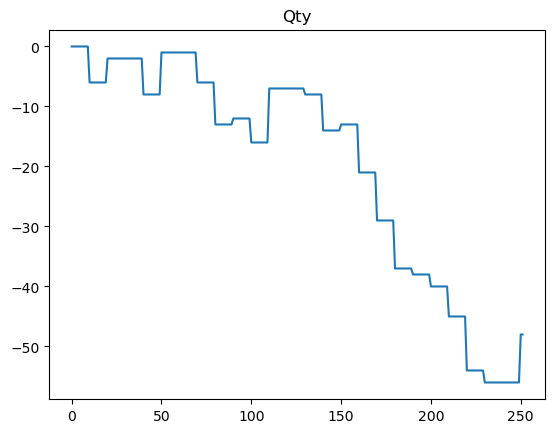

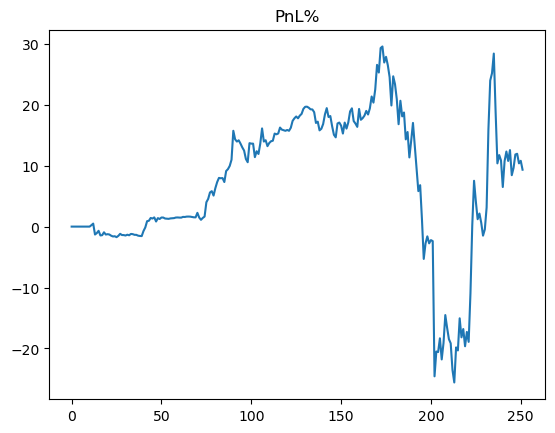

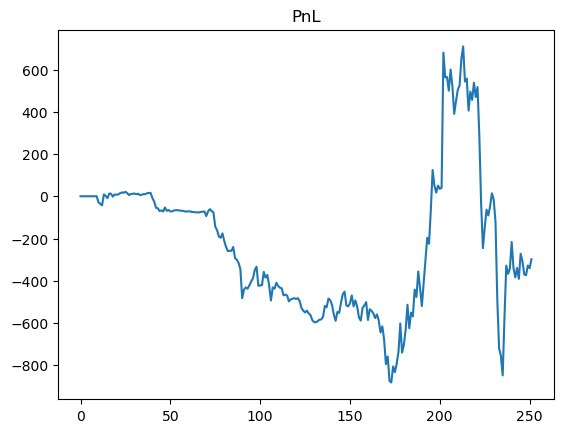

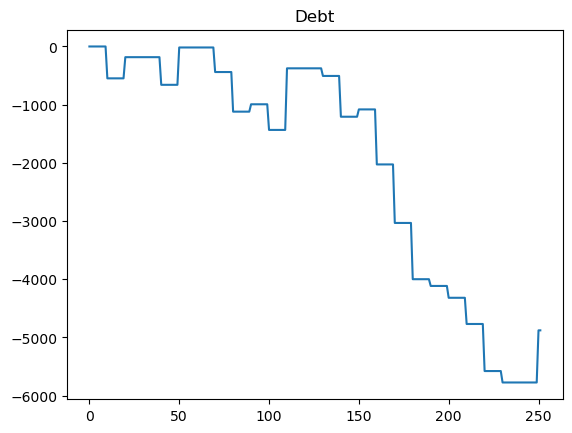

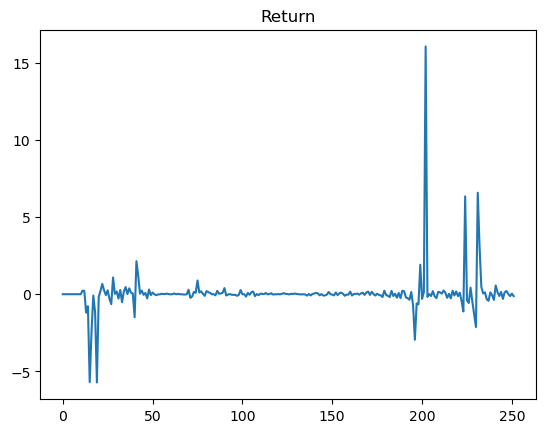

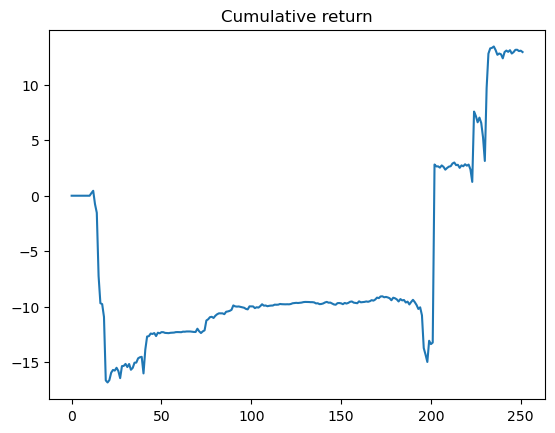

In [107]:
from typing import List, Tuple

class Commission():
    def calculate(self, units, price) -> float:
        if units > 0: # Buy
            return max(3, min(30, 0.03 * units * price))
        else:  # Sell
            return max(5, min(50, 0.05 * abs(units) * price))

class ExecutionSide(Enum):
    BUY = 1
    SELL = -1

class Execution():
    def __init__(self, quantity, price, commission):
        self.side = ExecutionSide.BUY if quantity > 0 else ExecutionSide.SELL
        self.quantity = abs(quantity)
        self.price = price
        self.commission = commission
        self.debt = commission + price * quantity
        self.unrealized_quantity = abs(quantity)
        self.unrealized_price_high = price
        self.unrealized_price_low = price
    def __str__(self):
        return f'{self.side.name} {abs(self.quantity)} @{self.price} unrealized_qty={self.unrealized_quantity} comm={self.commission} debt={self.debt}'

class Roundtrip:
    def __init__(self, entry: Execution, exit: Execution, quantity: float):
        side = entry.side
        entry_p = entry.price
        exit_p = exit.price

        pnl = quantity * (entry_p - exit_p if side == ExecutionSide.SELL
            else exit_p - entry_p)

        commission = (entry.commission / entry.quantity +
                      exit.commission / exit.quantity) * quantity

        highest_p = max(entry.unrealized_price_high, exit.unrealized_price_high)
        lowest_p = min(entry.unrealized_price_low, exit.unrealized_price_low)
        delta = highest_p - lowest_p
        entry_efficiency = 0.0
        exit_efficiency = 0.0
        total_efficiency = 0.0

        if side == ExecutionSide.BUY:
            maximum_adverse_price = lowest_p
            maximum_favorable_price = highest_p
            maximum_adverse_excursion = 100.0 * (1.0 - lowest_p / entry_p)
            maximum_favorable_excursion = 100.0 * (highest_p / exit_p - 1.0)
            if delta != 0.0:
                entry_efficiency = 100.0 * (highest_p - entry_p) / delta
                exit_efficiency = 100.0 * (exit_p - lowest_p) / delta
                total_efficiency = 100.0 * (exit_p - entry_p) / delta
        else:
            maximum_adverse_price = highest_p
            maximum_favorable_price = lowest_p
            maximum_adverse_excursion = 100 * (highest_p / entry_p - 1.0)
            maximum_favorable_excursion = 100.0 * (1.0 - lowest_p / exit_p)
            if delta != 0.0:
                entry_efficiency = 100.0 * (entry_p - lowest_p) / delta
                exit_efficiency = 100.0 * (highest_p - exit_p) / delta
                total_efficiency = 100.0 * (entry_p - exit_p) / delta
        self.side = side
        self.quantity = quantity
        self.entry_price = entry_p
        self.exit_price = exit_p
        self.highest_price = highest_p
        self.lowest_price = lowest_p
        self.commission = commission
        self.gross_pnl = pnl
        self.net_pnl = pnl - commission
        self.maximum_adverse_price = maximum_adverse_price
        self.maximum_favorable_price = maximum_favorable_price
        self.maximum_adverse_excursion = maximum_adverse_excursion
        self.maximum_favorable_excursion = maximum_favorable_excursion
        self.entry_efficiency = entry_efficiency
        self.exit_efficiency = exit_efficiency
        self.total_efficiency = total_efficiency
        print(str(self))

    def __str__(self):
        return f'RT {self.side.name} {self.quantity} entry={self.entry_price} exit={self.exit_price} comm={self.commission} net_pnl={self.net_pnl}'

class Position:
    def __init__(self, max_execution_quantity, commission: Commission,
                 inventory_method: InventoryMethods = InventoryMethods.FIFO):
        self._commission = commission
        self._max_execution_quantity = max_execution_quantity
        self._inventory_method = inventory_method

        self._quantity = 0
        self._price = 0
        self._debt = 0
        self._entry_pnl = 0

        self._executions: List[Execution] = []
        self._roundtrips: List[Roundtrip] = []
        self._mark_to_market_history = []

    def mark_to_market(self, current_price: float) -> None:
        # This is called daily to update the position's market value
        self._mark_to_market_history.append({
            'quantity': self._quantity,
            'debt': self._debt,
            'pnl': self._pnl(current_price),
            'pnl_pct': self._pnl_percentage(current_price),
            'unrealized_pnl': self._unrealized_pnl(current_price),
            'return': self._return(current_price),
        })
        self._price = current_price
        print(f'Mark to market @{current_price}', self._mark_to_market_history[-1])

    def execute_action(self, action: float, price: float) -> None:
        units = int(self._max_execution_quantity * abs(action))
        if units == 0:
            print(f'No integer units to execute: {self._max_execution_quantity * abs(action)}')
            return
        if action > 0: # Buy
            self.execute_buy(units, price)
        elif action < 0: # Sell
            self.execute_sell(units, price)

    def execute_buy(self, quantity: float, price: float) -> None:
        quantity = abs(quantity)
        commission = self._commission.calculate(quantity, price)
        execution = Execution(quantity, price, commission)
        #cost_basis = self._cost_basis(quantity, price, commission)
        print(str(execution)) # + f' cost basis {cost_basis}')
        self._match_roundtrips(execution)

        self._debt += execution.debt
        self._quantity = self._quantity + quantity
        self._executions.append(execution)
        if self._entry_pnl == 0:
            self._entry_pnl =  self._pnl(price)

    def execute_sell(self, quantity: float, price: float) -> None:
        quantity = abs(quantity)
        commission = self._commission.calculate(-quantity, price)
        execution = Execution(-quantity, price, commission)
        #realized_pnl = self._realized_pnl(quantity, price, commission)
        print(str(execution)) # + f' realized_PnL={realized_pnl}')
        self._match_roundtrips(execution)

        self._debt += execution.debt
        self._quantity = self._quantity - quantity
        self._executions.append(execution)
        if self._entry_pnl == 0:
            self._entry_pnl =  self._pnl(price)

    def _match_roundtrips(self, execution: Execution) -> None:
        position_side = ExecutionSide.BUY if self._quantity > 0 \
            else ExecutionSide.SELL
        if position_side == execution.side or self._quantity == 0 or \
            len(self._executions) < 1:
            return

        def match(entry: Execution, exit: Execution, quantity: float,
                  rts: List[Roundtrip]) -> float:
            if entry.side == exit.side or entry.unrealized_quantity == 0:
                return quantity
            min_qty = min(quantity, entry.unrealized_quantity)
            if min_qty > 0:
                entry.unrealized_quantity -= min_qty
                exit.unrealized_quantity -= min_qty
                rts.append(Roundtrip(entry, exit, min_qty))
            return quantity - min_qty

        rts: List[Roundtrip] = []
        quantity = execution.quantity

        if self._inventory_method == InventoryMethods.FIFO:
            for ex in self._executions:
                quantity = match(ex, execution, quantity, rts)
                if quantity <= 0:
                    break
        elif self._inventory_method == InventoryMethods.LIFO:
            for ex in reversed(self._executions):
                quantity = match(ex, execution, quantity, rts)
                if quantity <= 0:
                    break
        elif self._inventory_method == InventoryMethods.WAC:
            side = execution.side
            total_qty = sum(e.unrealized_quantity for e in self._executions if e.side != side)
            for e in self._executions:
                if quantity <= 0:
                    break
                if e.side == side or e.unrealized_quantity == 0:
                    continue
                wac_qty = int(e.unrealized_quantity * quantity / total_qty)
                min_qty = min(quantity, wac_qty)
                if min_qty > 0:
                    e.unrealized_quantity -= min_qty
                    execution.unrealized_quantity -= min_qty
                    rts.append(Roundtrip(e, execution, min_qty))
                quantity -= min_qty
        if quantity > 0:
            print(f'{self._inventory_method.name}: remaining quantity {quantity} after matching roundtrips')

    def _pnl(self, price: float) -> float:
        return self._quantity * price - self._debt

    def _pnl_percentage(self, current_price: float) -> float:
        pnl_current = self._pnl(current_price)
        return pnl_current / self._entry_pnl -1 \
            if self._entry_pnl != 0 else 0
        
    #def _cost_basis(self, quantity: float, price: float, buy_commission: float) -> float:
    #    return quantity * price + buy_commission

    def _unrealized_pnl(self, current_price: float) -> float:
        return self._pnl(current_price) - self._pnl(self._price)

    #def _realized_pnl(self, quantity_sold, sell_price, sell_commission):
    #    return quantity_sold * (sell_price - self._price) - sell_commission

    def _return(self, current_price: float) -> float:
        pnl_current = self._pnl(current_price)
        pnl_previous = self._mark_to_market_history[-1].get('pnl', 0) \
            if len(self._mark_to_market_history) > 0 else 0

        return pnl_current / pnl_previous -1 \
            if pnl_previous != 0 else 0

pos = Position(max_execution_quantity=10, commission=Commission(), inventory_method=InventoryMethods.FIFO)
i = 0
for price in price_history:
    if i > 0 and i % 10 == 0:
        pos.execute_action(uniform(-1, 1), price) 
    pos.mark_to_market(price)
    i += 1
#pos._execution_history
#pos._mark_to_market_history
for e in pos._executions:
    if e.unrealized_quantity > 0:
        print(f'Unmatched execution {e}')
for e in pos._executions:
    if e.unrealized_quantity <= 0:
        print(f'Matched execution {e}')
for rt in pos._roundtrips:
    print(rt)
print(f'PnL {pos._mark_to_market_history[-1].get("pnl", 0)}')
print(f'PnL% {pos._mark_to_market_history[-1].get("pnl_pct", 0)}')
print(f'Debt {pos._mark_to_market_history[-1].get("debt", 0)}')
print(f'Qty {pos._mark_to_market_history[-1].get("quantity", 0)}')

import matplotlib.pyplot as plt
plt.figure()
plt.plot([item.get('quantity', 0) for item in pos._mark_to_market_history])
plt.title('Qty')
plt.show
plt.figure()
plt.plot([item.get('pnl_pct', 0) for item in pos._mark_to_market_history])
plt.title('PnL%')
plt.show
plt.figure()
plt.plot([item.get('pnl', 0) for item in pos._mark_to_market_history])
plt.title('PnL')
plt.show
plt.figure()
plt.plot([item.get('debt', 0) for item in pos._mark_to_market_history])
plt.title('Debt')
plt.show
plt.figure()
plt.plot([item.get('return', 0) for item in pos._mark_to_market_history])
plt.title('Return')
plt.show
plt.figure()
plt.plot(np.array([item.get('return', 0) for item in pos._mark_to_market_history]).cumsum())
plt.title('Cumulative return')
plt.show



In [ ]:
from typing import List, Tuple

class Commission():
    def calculate(self, units, price) -> float:
        if units > 0:  # Buy
            return max(3, min(30, 0.03 * units * price))
        else:  # Sell
            return max(5, min(50, 0.05 * abs(units) * price))

class Position3:
    def __init__(self, max_execution_quantity, commission: Commission):
        self._commission = commission
        self._max_execution_quantity = max_execution_quantity

        self._quantity = 0
        self._price = 0
        self._debt = 0  # Track the debt

        self._execution_history: List[Tuple[float, float, float]] = []
        self._mark_to_market_history = []

    def mark_to_market(self, current_price: float) -> None:
        self._mark_to_market_history.append({
            'market_value': self._market_value(current_price),
            'unrealized_pnl': self._unrealized_pnl(current_price),
            'return': self._market_value_return(current_price),
        })
        self._previous_mark_to_market_value = self._market_value(current_price)
        self._price = current_price

    def execute_action(self, action: float, price: float) -> None:
        units = int(self._max_execution_quantity * abs(action))
        if action > 0:  # Buy
            self.execute_buy(units, price)
        elif action < 0:  # Sell
            self.execute_sell(units, price)

    def execute_buy(self, quantity: float, price: float) -> None:
        quantity = abs(quantity)
        buy_commission = self._commission.calculate(quantity, price)
        cost = self._cost_basis(quantity, price, buy_commission)
        self._debt += cost  # Increase debt by the cost of the purchase

        self._quantity += quantity
        self._execution_history.append((quantity, price, buy_commission))

    def execute_sell(self, quantity: float, price: float) -> None:
        quantity = abs(quantity)
        sell_commission = self._commission.calculate(-quantity, price)
        proceeds = quantity * price - sell_commission
        self._debt -= proceeds  # Decrease debt by the proceeds of the sale

        self._quantity -= quantity
        self._execution_history.append((-quantity, price, sell_commission))

    def _market_value(self, price: float) -> float:
        return self._quantity * price

    def _cost_basis(self, quantity: float, price: float, buy_commission: float) -> float:
        return quantity * price + buy_commission

    def _unrealized_pnl(self, current_price: float) -> float:
        return self._market_value(current_price) - self._market_value(self._price) - self._debt

    def _realized_pnl(self, quantity_sold, sell_price, sell_commission):
        return quantity_sold * (sell_price - self._price) - sell_commission

    def _market_value_return(self, current_price: float) -> float:
        market_value_current = self._market_value(current_price)
        market_value_previous = self._mark_to_market_history[-1].get('market_value', 0) \
            if len(self._mark_to_market_history) > 0 else 0

        return market_value_current / market_value_previous - 1 \
            if market_value_previous != 0 else 0

In [ ]:
from typing import List, Tuple

class Commission():
    def calculate(self, units, price) -> float:
        if units > 0: # Buy
            return max(3, min(30, 0.03 * units * price))
        else:  # Sell
            return max(5, min(50, 0.05 * abs(units) * price))

class ExecutionSide(Enum):
    BUY = 1
    SELL = -1

class Execution():
    def __init__(self, quantity, price, commission):
        self.side = ExecutionSide.BUY if quantity > 0 else ExecutionSide.SELL
        self.quantity = quantity
        self.price = price
        self.commission = commission
        self.debt = commission + price * quantity
        self.pnl = -commission
        self.realized_pnl = 0
        self.unrealized_quantity = quantity
        self.unrealized_price_high = price
        self.unrealized_price_low = price
    def __str__(self):
        return f'{self.side.name} {self.quantity} @{self.price} comm={self.commission} debt={self.debt}'

class Position:
    def __init__(self, max_execution_quantity, commission: Commission):
        self._commission = commission
        self._max_execution_quantity = max_execution_quantity

        self._quantity = 0
        self._price = 0
        self.entry_amount = 0
        self._debt = 0

        self._execution_history: List[Execution] = []
        self._mark_to_market_history = []

    def mark_to_market(self, current_price: float) -> None:
        # This is called daily to update the position's market value
        self._mark_to_market_history.append({
            'quantity': self._quantity,
            'debt': self._debt,
            'market_value': self._market_value(current_price),
            'unrealized_pnl': self._unrealized_pnl(current_price),
            'return': self._market_value_return(current_price),
        })
        self._price = current_price
        print(f'Mark to market @{current_price}', self._mark_to_market_history[-1])

    def execute_action(self, action: float, price: float) -> None:
        units = int(self._max_execution_quantity * abs(action))
        if action > 0: # Buy
            self.execute_buy(units, price)
        elif action < 0: # Sell
            self.execute_sell(units, price)

    def execute_buy(self, quantity: float, price: float) -> None:
        quantity = abs(quantity)
        commission = self._commission.calculate(quantity, price)
        execution = Execution(quantity, price, commission)
        cost_basis = self._cost_basis(quantity, price, commission)
        print(str(execution) + f' cost basis {cost_basis}')

        self._debt += execution.debt
        self._quantity = self._quantity + quantity
        self._execution_history.append(execution)

    def execute_sell(self, quantity: float, price: float) -> None:
        quantity = abs(quantity)
        commission = self._commission.calculate(-quantity, price)
        execution = Execution(-quantity, price, commission)
        realized_pnl = self._realized_pnl(quantity, price, commission)
        print(str(execution) + f' realized_PnL={realized_pnl}')

        self._debt += execution.debt
        self._quantity = self._quantity - quantity
        self._execution_history.append(execution)

    def _market_value(self, price: float) -> float:
        return self._quantity * price - self._debt
        
    def _cost_basis(self, quantity: float, price: float, buy_commission: float) -> float:
        return quantity * price + buy_commission

    def _unrealized_pnl(self, current_price: float) -> float:
        return self._market_value(current_price) - self._market_value(self._price)

    def _realized_pnl(self, quantity_sold, sell_price, sell_commission):
        return quantity_sold * (sell_price - self._price) - sell_commission

    def _market_value_return(self, current_price: float) -> float:
        market_value_current = self._market_value(current_price)
        market_value_previous = self._mark_to_market_history[-1].get('market_value', 0) \
            if len(self._mark_to_market_history) > 0 else 0

        return market_value_current / market_value_previous -1 \
            if market_value_previous != 0 else 0

pos = Position(max_execution_quantity=10, commission=Commission())
i = 0
for price in price_history:
    if i > 0 and i % 10 == 0:
        pos.execute_action(uniform(-1, 1), price) 
    pos.mark_to_market(price)
    i += 1
#pos._execution_history
#pos._mark_to_market_history

In [ ]:
"""
    self._average_price = 0

    def execute_buy(self, quantity: float, price: float) -> None:
        quantity = abs(quantity)
        buy_commission = self._commission.calculate(quantity, price)
        cost_basis = self._cost_basis(quantity, price, buy_commission)

        new_quantity = self._quantity + quantity
        new_average_price = (self._average_price * self._quantity +
            price * quantity) / new_quantity if new_quantity != 0 else 0

        self._quantity = new_quantity
        self._average_price = new_average_price
        self._execution_history.append((quantity, price, buy_commission))

    def execute_sell(self, quantity: float, price: float) -> float:
        quantity = abs(quantity)
        sell_commission = self._commission.calculate(-quantity, price)
        realized_pnl = self._realized_pnl(quantity, price, sell_commission)

        new_quantity = self._quantity - quantity
        new_average_price = (self._average_price * self._quantity -
            price * quantity) / new_quantity if new_quantity != 0 else 0

        self._execution_history.append((-quantity, price, sell_commission))

If you don't want to introduce a cash balance, there are a few common approaches you could consider:
Credit System: You could assume that the user has an unlimited amount of credit to make purchases. This is the simplest approach, but it might not be realistic for many applications.
Debt Tracking: You could track the amount of debt the user incurs with each purchase. This would allow you to keep track of how much the user "owes" without needing to manage a cash balance.        

The provided code appears to be a Python implementation of a trading position management system, including a Position class, trade execution methods, and market valuation calculations. 

I have a Python implementation of a trading position management system, including trade execution methods, and market valuation calculations.
In this code, I don't want to introduce the cash balance, because it is intended for a RL gymnasium environment for simulation of the trading process. Since we want to train on differentprice histories, which can be big and small,introducing an absolute amount of initial cash is problematic.
Instead, I've heard about Debt Tracking methodology, where we track the amount of debt the user incurs with each purchase (buy or sell execution).
This would allow us to keep track of how much the user "owes" without needing to manage a cash balance.

I would like to ask you to help me implement this Debt Tracking methodology in the provided code. I would like to keep the code as close to the original as possible, but with the Debt Tracking methodology implemented.
The Python code is below.

[code}]


pos = Position3()
i = 0
for price in price_history:
    if i == 0:
        pos.execute_action(1, price) 
    pos.mark_to_market(price)
    i += 1
pos._daily_history
"""

In [ ]:
#https://gist.github.com/andrewschreiber/e9a21bba9c604a790e605fbacd3f4109
#In Jupyter
import matplotlib.pyplot as plt
%matplotlib inline
#After each step
def show_state(env, step=0):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s. Step: %d" % (env._spec.id,step))
    
    plt.pause(0.001)  # pause for plots to update

    if is_ipython:
        display.clear_output(wait=True)
        display.display(plt.gcf())

# not doing display.display(plt.gcf()) made it much better to view

In [ ]:
#https://stackoverflow.com/questions/40195740/how-to-run-openai-gym-render-over-a-server
#Got a simple solution working:
#CartPole
#If on a linux server, open jupyter with
#$ xvfb-run -s "-screen 0 1400x900x24" jupyter notebook
#In Jupyter
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
#After each step
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())
#############################################################
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
#############################################
#Inside the notebook:

import gym
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('MountainCar-v0') # insert your favorite environment
env.reset()
plt.imshow(env.render(mode='rgb_array')
#Now you can put the same thing in a loop to render it multiple times.

from IPython import display

for _ in range(100):
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

In [ ]:
#https://stackoverflow.com/questions/7821518/save-plot-to-numpy-array
io_buf = io.BytesIO()
fig.savefig(io_buf, format='raw', dpi=DPI)
io_buf.seek(0)
img_arr = np.reshape(np.frombuffer(io_buf.getvalue(), dtype=np.uint8),
                     newshape=(int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]), -1))
io_buf.close()

# better
fig = plt.figure(figsize=(16, 4), dpi=128)
fig.savefig(io_buf, format='raw', dpi=128)

In [ ]:
#https://stackoverflow.com/questions/60765613/how-to-show-episode-in-rendered-openai-gym-environment
import os
import imageio
import numpy as np
from PIL import Image
import PIL.ImageDraw as ImageDraw
import matplotlib.pyplot as plt    


def _label_with_episode_number(frame, episode_num):
    im = Image.fromarray(frame)

    drawer = ImageDraw.Draw(im)

    if np.mean(im) < 128:
        text_color = (255,255,255)
    else:
        text_color = (0,0,0)
    drawer.text((im.size[0]/20,im.size[1]/18), f'Episode: {episode_num+1}', fill=text_color)

    return im


def save_random_agent_gif(env):
    frames = []
    for i in range(5):
        state = env.reset()        
        for t in range(500):
            action = env.action_space.sample()

            frame = env.render(mode='rgb_array')
            frames.append(_label_with_episode_number(frame, episode_num=i))

            state, _, done, _ = env.step(action)
            if done:
                break

    env.close()

    imageio.mimwrite(os.path.join('./videos/', 'random_agent.gif'), frames, fps=60)


env = gym.make('CartPole-v1')
save_random_agent_gif(env)
#You can find a working version of the code here: https://github.com/RishabhMalviya/dqn_experiments/blob/master/train_and_visualize.py#L10
